# REPORT

## Sanzioni e Genere: Numeri, Motivazioni e il Targeting delle Donne



In [5]:
import pandas as pd

final_table_df = pd.read_csv('Dataset_complete_final.csv')

# totale casi per attore sanzionante
total_cases_per_actor_table = final_table_df['Designation_source'].value_counts().reset_index()
total_cases_per_actor_table.columns = ['Designation_source', 'Case_Count']

totale_casi_US = total_cases_per_actor_table['Case_Count'].iloc[0]
totale_casi_EU = total_cases_per_actor_table['Case_Count'].iloc[1]
totale_casi_UK = total_cases_per_actor_table['Case_Count'].iloc[2]
totale_casi_Australia = total_cases_per_actor_table['Case_Count'].iloc[3]
totale_casi_UN = total_cases_per_actor_table['Case_Count'].iloc[4]
totale_casi_UK_UN = total_cases_per_actor_table['Case_Count'].iloc[5]

# totale individui per attore sanzionante

total_ind_per_actor_table = final_table_df.groupby('Designation_source')['Name'].nunique().reset_index()
total_ind_per_actor_table.columns = ['Designation_source', 'Individual_Count']


totale_ind_US = total_ind_per_actor_table['Individual_Count'].iloc[5]
totale_ind_EU = total_ind_per_actor_table['Individual_Count'].iloc[1]
totale_ind_UK = total_ind_per_actor_table['Individual_Count'].iloc[2]
totale_ind_Australia = total_ind_per_actor_table['Individual_Count'].iloc[0]
totale_ind_UN = total_ind_per_actor_table['Individual_Count'].iloc[4]
totale_ind_UK_UN = total_ind_per_actor_table['Individual_Count'].iloc[3]


data = [
    ['Regno Unito', totale_casi_UK, totale_ind_UK],
    ['Nazioni Unite', totale_casi_UN, totale_ind_UN],
    ['Nazioni Unite - Regno unito', totale_casi_UK_UN, totale_ind_UK_UN],
    ['Unione Europea', totale_casi_EU, totale_ind_EU],
    ['Australia', totale_casi_Australia, totale_ind_Australia],
    ['Stati Uniti', totale_casi_US, totale_ind_US],
]

headers = ['Attore sanzionante', 'Totale casi', 'Totale individui']
result_table = pd.DataFrame(data, columns=headers)

conteggio_casi_generale = result_table["Totale casi"].sum()
conteggio_ind_generale = result_table["Totale individui"].sum()

total_row = pd.DataFrame([['**Totale**', conteggio_casi_generale, conteggio_ind_generale]], columns=headers)
final_table = pd.concat([result_table, total_row], ignore_index=True)


#print(final_table.to_markdown(index=False))
final_table.to_csv("Tabella_1.csv",index=False)


### Tabella 1 - Totale casi, individui e regimi di sanzioni per attore sanzionante

| Attore sanzionante          |   Totale casi |   Totale individui |
|:----------------------------|--------------:|-------------------:|
| Regno Unito                 |          2991 |               2953 |
| Nazioni Unite               |           678 |                668 |
| Nazioni Unite - Regno unito |             8 |                  8 |
| Unione Europea              |          3182 |               3171 |
| Australia                   |          1665 |               1665 |
| Stati Uniti                 |          7996 |               7414 |
| **Totale**                  |         16520 |              15879 |

In [47]:
import pandas as pd

final_table_df = pd.read_csv('Dataset_complete_final.csv')

# Assicura che Gender sia stringa e normalizza
final_table_df['Gender'] = final_table_df['Gender'].astype(str).str.lower()

# Totale individui unici per Designation_source
totale_ind_per_attore = (
    final_table_df.groupby('Designation_source')['Name']
    .nunique()
    .reset_index()
    .rename(columns={'Name': 'Totale individui'})
)

# Individui con genere indicato
filtered_df_gen = final_table_df[final_table_df['Gender'] != 'n.a.']
with_gender = (
    filtered_df_gen.groupby('Designation_source')['Name']
    .nunique()
    .reset_index()
    .rename(columns={'Name': 'Genere indicato'})
)

# Individui con genere non indicato
filtered_df_na = final_table_df[final_table_df['Gender'] == 'n.a.']
without_gender = (
    filtered_df_na.groupby('Designation_source')['Name']
    .nunique()
    .reset_index()
    .rename(columns={'Name': 'Genere non indicato'})
)

# Unisci tutto
table = totale_ind_per_attore.merge(with_gender, on='Designation_source', how='left')
table = table.merge(without_gender, on='Designation_source', how='left')

# Sostituisci NaN con 0
table.fillna(0, inplace=True)

# Calcola percentuali
table['% (y)'] = (table['Genere indicato'] / table['Totale individui'] * 100).round(1)
table['% (n)'] = (table['Genere non indicato'] / table['Totale individui'] * 100).round(1)

# Ora scegli le colonne giuste già con i nomi corretti
ordered_table = table[
    ['Designation_source', 'Genere indicato', '% (y)', 'Genere non indicato', '% (n)']
]

# Totali
totale_gen_indicato = ordered_table["Genere indicato"].sum()
totale_gen_non_indicato = ordered_table["Genere non indicato"].sum()

# Headers
headers = ['Designation_source', 'Genere indicato', '% (y)', 'Genere non indicato', '% (n)']

# Riga totale
total_row = pd.DataFrame(
    [['**Totale**', totale_gen_indicato, '', totale_gen_non_indicato, '']],
    columns=headers
)

# Concatena
final_table = pd.concat([ordered_table, total_row], ignore_index=True)

# Output
#print(final_table.to_markdown(index=False))
final_table.to_csv("Tabella_2.csv", index=False)


### Tabella 2 - Distribuzione degli individui con o senza indicazione di genere per attore sanzionante
| Designation_source   |   Genere indicato | % (y)   |   Genere non indicato | % (n)   |
|:---------------------|------------------:|:--------|----------------------:|:--------|
| Australia            |                 0 | 0.0     |                  1665 | 100.0   |
| EU                   |              3171 | 100.0   |                     0 | 0.0     |
| UK                   |              2585 | 87.5    |                   372 | 12.6    |
| UK_UN                |                 7 | 87.5    |                     1 | 12.5    |
| UN                   |               109 | 16.3    |                   559 | 83.7    |
| US                   |              7414 | 100.0   |                     0 | 0.0     |
| **Totale**           |             13286 |         |                  2597 |         |

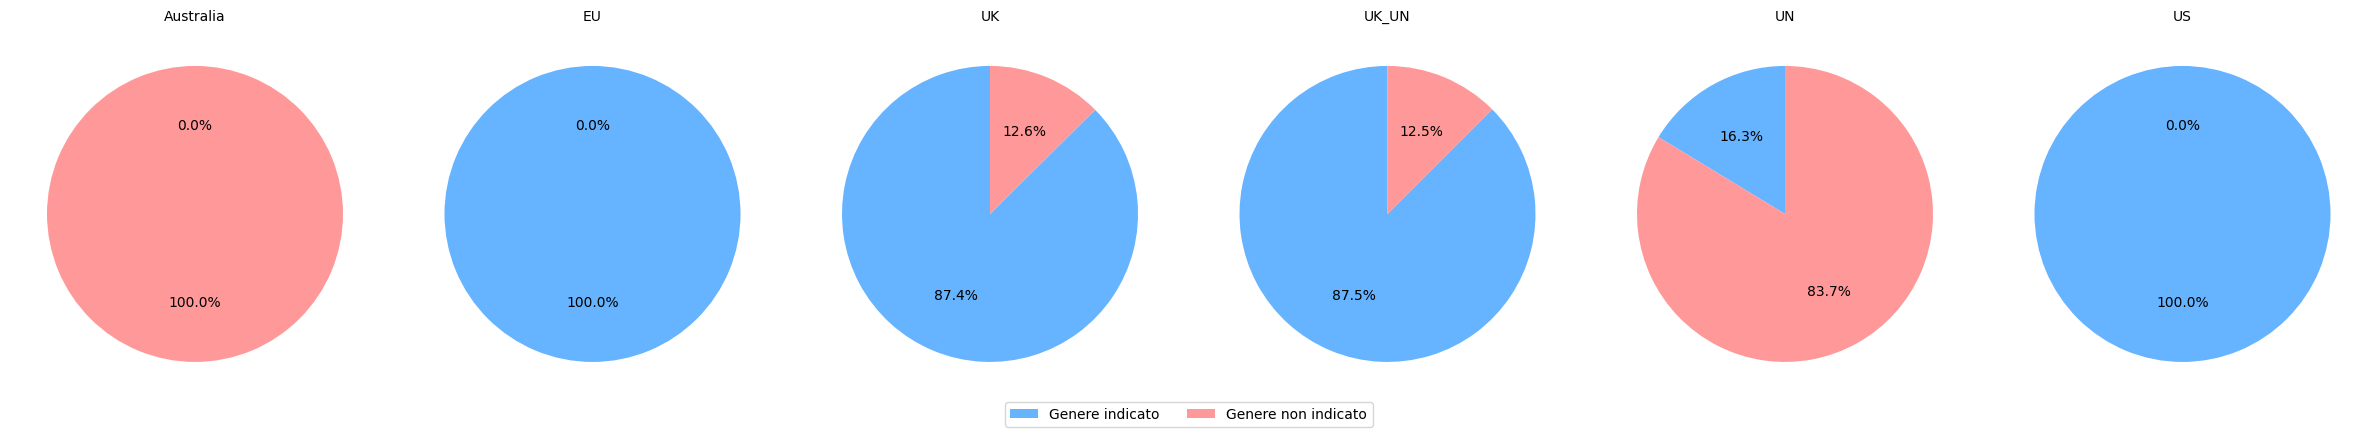

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the table
tabella_2 = pd.read_csv("Tabella_2.csv")

# Prepare data (excluding the last 'Totale' row)
Designation_source_list = tabella_2["Designation_source"].tolist()[:-1]
gender_specified = tabella_2["Genere indicato"].tolist()[:-1]
gender_not_specified = tabella_2["Genere non indicato"].tolist()[:-1]

# Number of actors
n = len(Designation_source_list)

# Setup figure
fig, axes = plt.subplots(1, n, figsize=(4*n, 4))  # One row, n columns
if n == 1:
    axes = [axes]  # ensure axes is always iterable

# Colors and labels
colors = ['#66b3ff', '#ff9999']
labels = ['Genere indicato', 'Genere non indicato']

# For each actor, plot a pie chart without labels
for i, ax in enumerate(axes):
    values = [gender_specified[i], gender_not_specified[i]]
    ax.pie(values, labels=None, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title(Designation_source_list[i], fontsize=10)

# Add a single global legend
fig.legend(labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.05))

# Global adjustments
#plt.suptitle('Distribuzione per attore sanzionante', fontsize=16)
plt.tight_layout()
plt.show()


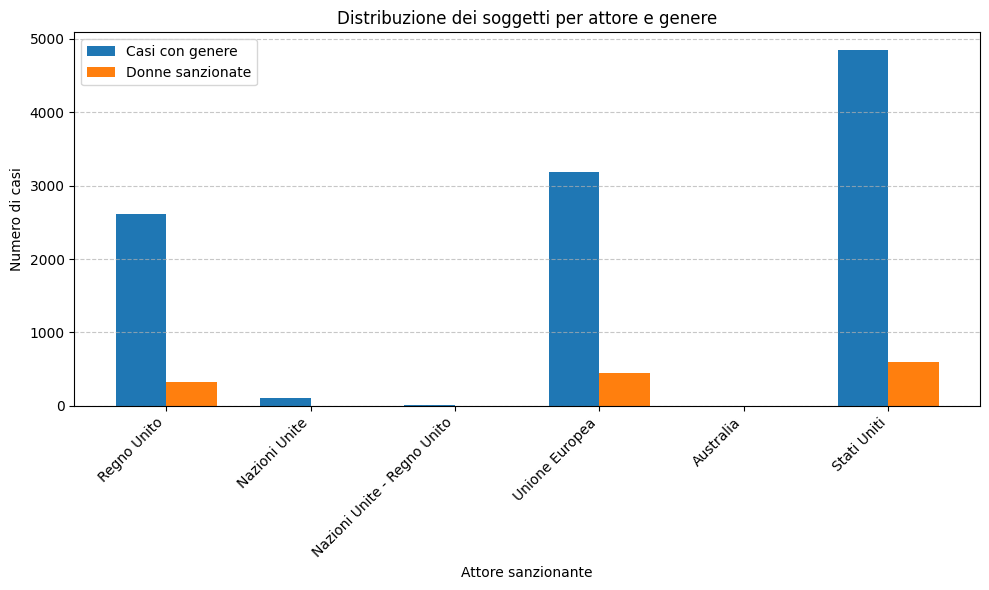

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data
entities = [
    "Regno Unito",
    "Nazioni Unite",
    "Nazioni Unite - Regno Unito",
    "Unione Europea",
    "Australia",
    "Stati Uniti"
]

# Cases with gender info
cases_with_gender = [2620, 109, 7, 3186, 0, 4846]

# Cases of women sanctioned
women_sanctioned = [326, 3, 0, 441, 0, 592]

# X-axis positions
x = np.arange(len(entities))
width = 0.35  # Width of bars

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, cases_with_gender, width, label='Casi con genere')
bars2 = ax.bar(x + width/2, women_sanctioned, width, label='Donne sanzionate')

# Labels and title
ax.set_ylabel('Numero di casi')
ax.set_xlabel('Attore sanzionante')
ax.set_title('Distribuzione dei soggetti per attore e genere')
ax.set_xticks(x)
ax.set_xticklabels(entities, rotation=45, ha="right")
ax.legend()

# Add grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Layout
plt.tight_layout()

# Show plot
plt.show()


I dati riportati in **Tabella 3** mostrano il numero di casi in cui ciascuna categoria di sanzione è stata attribuita a donne sanzionate. La percentuale indicata accanto al numero assoluto si basa sulla frequenza relativa di attribuzione della singola categoria rispetto al totale delle donne sanzionate da ciascun attore. Si precisa che la somma delle categorie non corrisponde al totale delle donne sanzionate, in quanto un singolo individuo può essere ricondotto a più di una categoria contemporaneamente. Pertanto, le percentuali non devono essere interpretate come mutuamente esclusive. Su un totale di 1.362 donne sanzionate, sono state registrate 696 applicazioni di _activity-based sanctions_ (51%), 107 di _profit-based sanctions_ (8%), 137 di _status-based sanctions_ (10%) e 74 di _family member sanctions_ (5%).

---

**Tabella 3.** Distribuzione delle donne sanzionate secondo la classificazione delle motivazioni per il listaggio.

| **Attore sanzionante** | **Activity-based sanctions frequency (% relative frequency)** | **Profit-based sanctions frequency (% relative frequency)** | **Status-based sanctions frequency (% relative frequency)** | **Family member sanctions frequency (% relative frequency)** | **Totale donne sanzionate** |
|:----------------------:|:-------------------------------------------------------------:|:------------------------------------------------------------:|:-------------------------------------------------------------:|:-------------------------------------------------------------:|:---------------------------:|
| _Regno Unito_           | 277 (84%)                                                    | 69 (21%)                                                     | 87 (27%)                                                      | 44 (13%)                                                      | 326                         |
| _Nazioni Unite_         | 3 (100%)                                                     | 0                                                            | 0                                                             | 0                                                            | 3                           |
| _Nazioni Unite - Regno Unito_ | 0                                                      | 0                                                            | 0                                                             | 0                                                            | 0                           |
| _Unione Europea_        | 416 (94%)                                                    | 38 (8%)                                                      | 51 (10%)                                                      | 0                                                            | 441                         |
| _Australia_             | -                                                            | -                                                            | -                                                             | -                                                            | Genere non menzionato       |
| _Stati Uniti_           | -                                                            | -                                                            | -                                                             | -                                                            | 592                         |
| **Totale**              | **696 (51%)**                                                | **107 (8%)**                                                 | **137 (10%)**                                                 | **74 (5%)**                                                   | **1.362**                   |


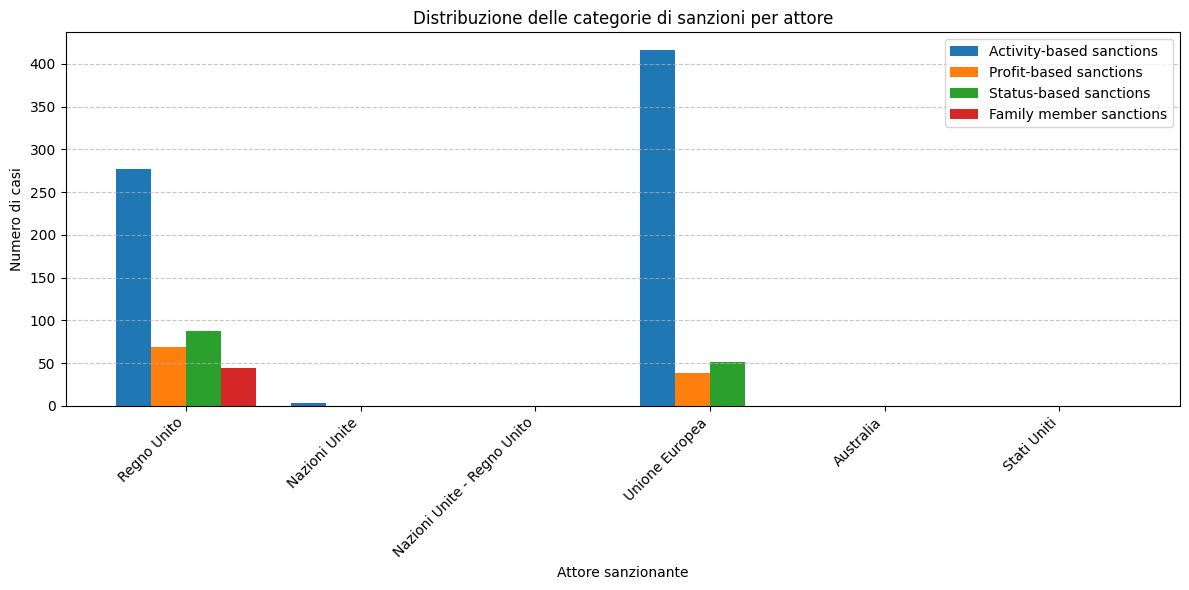

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data
actors = [
    'Regno Unito', 
    'Nazioni Unite', 
    'Nazioni Unite - Regno Unito', 
    'Unione Europea', 
    'Australia', 
    'Stati Uniti'
]

activity_based = [277, 3, 0, 416, 0, 0]
profit_based = [69, 0, 0, 38, 0, 0]
status_based = [87, 0, 0, 51, 0, 0]
family_member = [44, 0, 0, 0, 0, 0]
total_sanctioned = [326, 3, 0, 441, None, 592]  # 'None' to indicate missing

# Create a DataFrame
df = pd.DataFrame({
    'Activity-based sanctions': activity_based,
    'Profit-based sanctions': profit_based,
    'Status-based sanctions': status_based,
    'Family member sanctions': family_member
}, index=actors)

# Plotting
bar_width = 0.2
index = np.arange(len(actors))

fig, ax = plt.subplots(figsize=(12, 6))

# Create each bar group
ax.bar(index - 1.5*bar_width, df['Activity-based sanctions'], width=bar_width, label='Activity-based sanctions')
ax.bar(index - 0.5*bar_width, df['Profit-based sanctions'], width=bar_width, label='Profit-based sanctions')
ax.bar(index + 0.5*bar_width, df['Status-based sanctions'], width=bar_width, label='Status-based sanctions')
ax.bar(index + 1.5*bar_width, df['Family member sanctions'], width=bar_width, label='Family member sanctions')

# Formatting
ax.set_xlabel('Attore sanzionante')
ax.set_ylabel('Numero di casi')
ax.set_title('Distribuzione delle categorie di sanzioni per attore')
ax.set_xticks(index)
ax.set_xticklabels(actors, rotation=45, ha="right")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Discussione

L'analisi dei dati raccolti evidenzia alcune dinamiche significative relative alla presenza del genere nelle liste di sanzioni e alla distribuzione delle donne tra le diverse categorie di motivazioni per il listaggio.

In primo luogo, come riportato in Tabella 1, su un totale di 15.935 individui sanzionati, soltanto per il 68% dei casi (10.768) il genere è stato specificato, mentre per il restante 32% (5.167) l'informazione relativa al genere è assente. Tale dato suggerisce che l'indicazione del genere non è uniforme tra gli attori sanzionanti. In particolare, l'Unione Europea si distingue per una piena copertura dei dati di genere (100%), seguita dal Regno Unito (88%) e Nazioni Unite - Regno Unito (88%). Di contro, le Nazioni Unite riportano l'indicazione del genere soltanto nel 16% dei casi, mentre per l'Australia il genere non è mai menzionato. Gli Stati Uniti si collocano in una posizione intermedia, con il 65% dei casi recanti informazioni sul genere.

Per quanto riguarda la presenza delle donne tra i soggetti designati (Tabella 2), emerge che, considerando esclusivamente i casi in cui il genere è specificato (10.768 soggetti), le donne rappresentano una quota pari al 12% (1.362 individui). Questa percentuale appare relativamente omogenea tra i principali attori: Regno Unito (12%), Unione Europea (14%) e Stati Uniti (12%). Le Nazioni Unite, invece, registrano una percentuale significativamente inferiore, pari allo 0,27%. Non risultano donne sanzionate nel regime Nazioni Unite - Regno Unito, mentre i dati relativi all'Australia non consentono analisi di genere.

Passando alla classificazione delle motivazioni per la sanzione delle donne (Tabella 3), si osserva che la maggior parte delle applicazioni riguarda le *activity-based sanctions* (696 casi, pari al 51% del totale delle donne sanzionate). Seguono, in misura minore, le *status-based sanctions* (137 casi, 10%), le *profit-based sanctions* (107 casi, 8%) e, infine, le *family member sanctions* (74 casi, 5%). Si ricorda che, poiché una stessa donna può essere sanzionata per motivazioni riconducibili a più categorie contemporaneamente, la somma delle applicazioni non coincide con il numero totale di donne sanzionate.

In particolare, il Regno Unito e l'Unione Europea risultano essere gli attori che applicano in maniera prevalente le *activity-based sanctions*, rispettivamente nell'84% e nel 94% dei casi riguardanti donne. Le *profit-based sanctions* e le *status-based sanctions* presentano una presenza marginale, mentre l'attribuzione della categoria *family member sanctions* è piuttosto contenuta.

Nel complesso, i dati mostrano una significativa attenzione da parte di alcuni attori sanzionatori all’indicazione del genere e una prevalenza di motivazioni legate all’attività diretta delle donne sanzionate piuttosto che alla loro mera appartenenza familiare o alla loro appartenenza/associazione a gruppi, come le élite governative, i gruppi terroristici o le istituzioni di ricerca scientifica.


### Conclusioni 
